In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 图像平滑
使用不同的低通滤波器对图像进行模糊。
使用自定义的滤波器对图像进行卷积（2D卷积）。
1D信号可以使用低通滤波LPF、高通滤波HPF，2D信号同理也可以使用LPF去除噪声，模糊图像，使用HPF找到图像的边缘。
如下使用5x5的平均滤波器核对一幅图像滤波。
使用低通滤波器可以达到图像模糊的目的，有助于去除噪声，实际是去除图像中国年的高频成分（噪声、边界），所以边界也会被模糊。

$$
K=\frac{1}{25}\left[
\begin{matrix}
1 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & 1 & 1
\end{matrix}
\right]$$

In [2]:
# cv2.filter2D?
# np.ones?
# cv2.cvtColor
# cv2.blur?
# cv2.GaussianBlur?
# cv2.getGaussianKernel?
cv2.medianBlur?
cv2.bilateralFilter?

In [3]:
def bgr_to_rgb(bgr):
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    return rgb

In [4]:
img_src_bgr = cv2.imread('../../data/lena.jpg')

In [5]:
kernel = np.ones((5, 5), np.float32)/25

In [6]:
img_src_bgr_filter = cv2.filter2D(img_src_bgr, ddepth=-1, kernel=kernel)

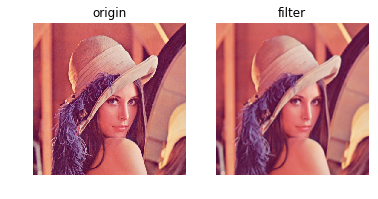

In [7]:
plt.subplot(121)
plt.imshow(bgr_to_rgb(img_src_bgr))
plt.axis('off')
plt.title('origin')
plt.subplot(122)
plt.imshow(bgr_to_rgb(img_src_bgr_filter))
plt.axis('off')
plt.title('filter')

# 平均
由一个归一化卷积框实现，用卷积框覆盖区域所有像素的平均值来代替中心元素，可以使用cv2.blur和cv2.boxFilter来实现这个任务，如果不对卷积框归一化，可以使用cv2.boxFilter设置其中参数normalize=False。

In [8]:
ksize = (5, 5)
img_src_bgr_filter = cv2.blur(img_src_bgr, ksize=ksize)

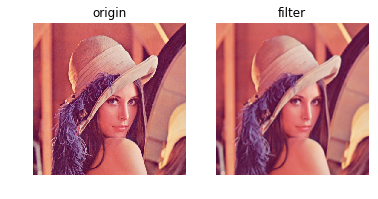

In [9]:
plt.subplot(121)
plt.imshow(bgr_to_rgb(img_src_bgr))
plt.axis('off')
plt.title('origin')
plt.subplot(122)
plt.imshow(bgr_to_rgb(img_src_bgr_filter))
plt.axis('off')
plt.title('filter')

# 高斯模糊
平均模糊卷积核元素均为1，高斯模糊高斯核元素符合高斯分布。可以使用cv2.GaussianBlur实现高斯模糊，输入参数为高斯核大小，以及高斯核沿X和Y方向的标准差，如果只指定了X方向的标准差，Y方向也会取相同值，如果设置为0，那么函数会根据高斯核大小自动计算标准差，高斯滤波可以有效的从图像中去除高斯噪声。可以使用cv2.getGaussianKernel()获取高斯核。

In [10]:
ksize = (5, 5)
img_src_bgr_filter = cv2.GaussianBlur(img_src_bgr, ksize=ksize, sigmaX=0)

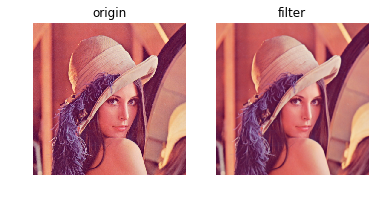

In [11]:
plt.subplot(121)
plt.imshow(bgr_to_rgb(img_src_bgr))
plt.axis('off')
plt.title('origin')
plt.subplot(122)
plt.imshow(bgr_to_rgb(img_src_bgr_filter))
plt.axis('off')
plt.title('filter')

# 中值模糊
卷积核对应像素的中值来替代中心像素的值，该滤波器经常用来去除椒盐噪声，其卷积核的大小是一个奇数。

In [12]:
img_src_bgr_filter = cv2.medianBlur(img_src_bgr, ksize=5)

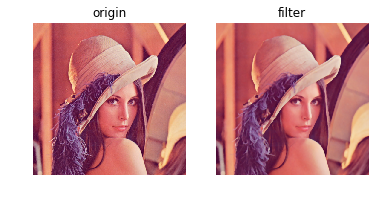

In [13]:
plt.subplot(121)
plt.imshow(bgr_to_rgb(img_src_bgr))
plt.axis('off')
plt.title('origin')
plt.subplot(122)
plt.imshow(bgr_to_rgb(img_src_bgr_filter))
plt.axis('off')
plt.title('filter')

# 双边滤波
双边滤波能在保持边界清晰的情况下有效的去除噪声，但是该滤波器相比其他滤波器会比较慢，高斯滤波器是求中心点邻近区域像素的高斯加权平均值，这种高斯滤波器只考虑像素之间的空间关系，而不会考虑像素值之间的相似关系（像素的相似度），所以这种方法不会考虑一个像素是否位于边界，因此边界也会被模糊掉。
双边滤波在同时使用空间高斯权重和灰度值相似性高斯权重，其中空间高斯函数确保只有邻近区域的像素对中心点有影响，灰度值相似性高斯函数确保只有与中心像素灰度值相似的才会被用来做模糊运算（确保边界不会被模糊掉，因为边界处的灰度值变化比较大，保证在边界处不会进行模糊运算）。
参考[A Gentle Introduction to Bilateral Filtering and its Applications](http://people.csail.mit.edu/sparis/bf_course/)

In [14]:
# d表示滤波领域，sigmaColor表示空间高斯函数标准差，sigmaSpace表示颜色函数标准差
img_src_bgr_filter = cv2.bilateralFilter(img_src_bgr, d=9, sigmaColor=75, sigmaSpace=75)

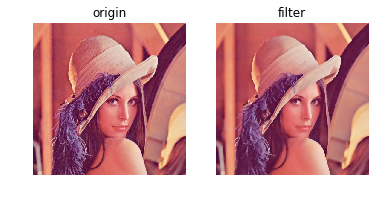

In [15]:
plt.subplot(121)
plt.imshow(bgr_to_rgb(img_src_bgr))
plt.axis('off')
plt.title('origin')
plt.subplot(122)
plt.imshow(bgr_to_rgb(img_src_bgr_filter))
plt.axis('off')
plt.title('filter')